Learned Parameters (theta):
 [8.42981136e+02 3.24337108e+00 1.77869393e+00 2.75563690e+00
 7.80468188e-01 3.34107075e-01 5.34135652e-01 8.93700886e-02
 7.55107677e-01 6.91245338e-01 4.12190531e-01]


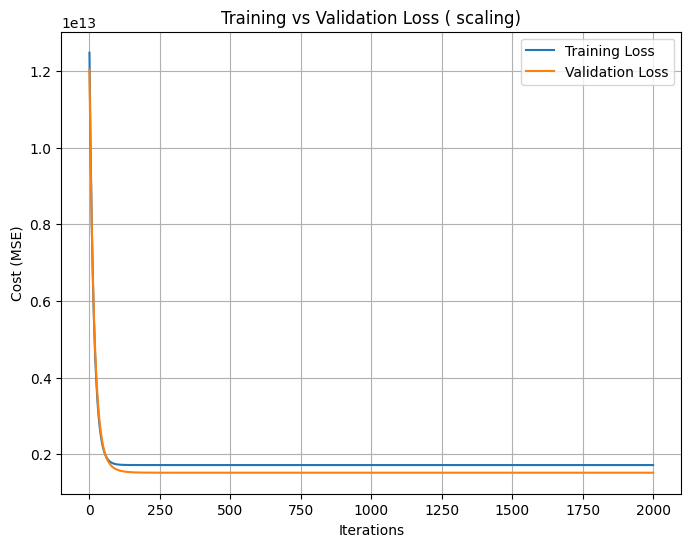

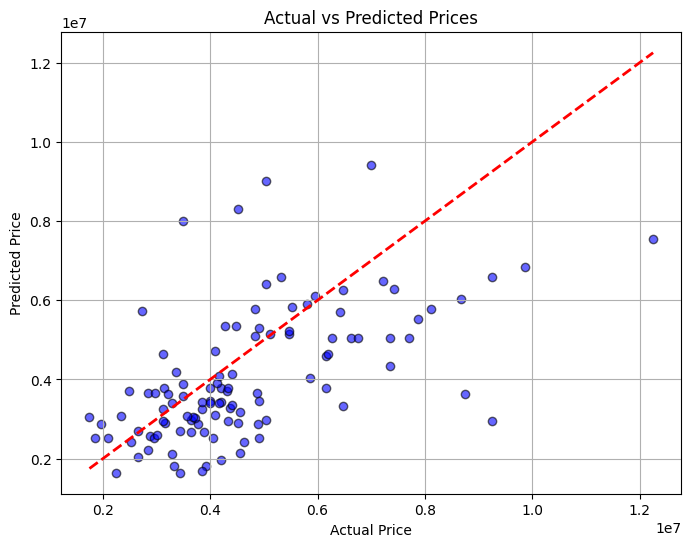

In [17]:
# PROBLEM 1B

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = "https://drive.google.com/uc?export=download&id=1r0gkZL9150nrhZOtz9fIbVGKMqe45fbG"
df = pd.read_csv(url)

x1 = df["area"].astype(float)
x2 = df["bedrooms"].astype(float)
x3 = df["bathrooms"].astype(float)
x4 = df["stories"].astype(float)
x5 = df["mainroad"].map({"yes": 1, "no": 0}).astype(float)
x6 = df["guestroom"].map({"yes": 1, "no": 0}).astype(float)
x7 = df["basement"].map({"yes": 1, "no": 0}).astype(float)
x8 = df["hotwaterheating"].map({"yes": 1, "no": 0}).astype(float)
x9 = df["airconditioning"].map({"yes": 1, "no": 0}).astype(float)
x10 = df["parking"].astype(float)
x11 = df["prefarea"].map({"yes": 1, "no": 0}).astype(float)

y = df["price"].astype(float).values.reshape(-1, 1)

# Combine
X = np.column_stack((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11))

np.random.seed(42)
indices = np.arange(len(X))
np.random.shuffle(indices)
X_raw = X[indices]
y = y[indices]

# Train/Validation split
train_size = int(0.8 * len(X_raw))
X_train, y_train = X_raw[:train_size], y[:train_size]
X_val, y_val = X_raw[train_size:], y[train_size:]


def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)
    return J

def gradient_descent(X_train, y_train, X_val, y_val, theta, alpha, iterations):
    m = len(y_train)
    train_cost_history = []
    val_cost_history = []

    for i in range(iterations):
        predictions = X_train.dot(theta)
        errors = predictions - y_train
        theta -= (alpha / m) * X_train.T.dot(errors)

        # record costs
        train_cost = compute_cost(X_train, y_train, theta)
        val_cost = compute_cost(X_val, y_val, theta)
        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

    return theta, train_cost_history, val_cost_history

theta = np.zeros((X_train.shape[1], 1))
alpha = 0.000000001
iterations = 2000

theta, train_history, val_history = gradient_descent(
    X_train, y_train, X_val, y_val, theta, alpha, iterations
)

print("Learned Parameters (theta):\n", theta.flatten())

# Plot Loss Curve
plt.figure(figsize=(8,6))
plt.plot(range(iterations), train_history, label="Training Loss")
plt.plot(range(iterations), val_history, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title(f"Training vs Validation Loss ( scaling)")
plt.legend()
plt.grid(True)
plt.show()

#  Predictions
y_pred = X_val.dot(theta)

plt.figure(figsize=(8,6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.6, edgecolors='k')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()


TRAINING WITH STANDARDIZATION:
Final Training Cost (scaled): 0.1597
Final Validation Cost (scaled): 0.1849
TRAINING WITH NORMALIZATION:
Final Training Cost (scaled): 0.2550
Final Validation Cost (scaled): 0.2740


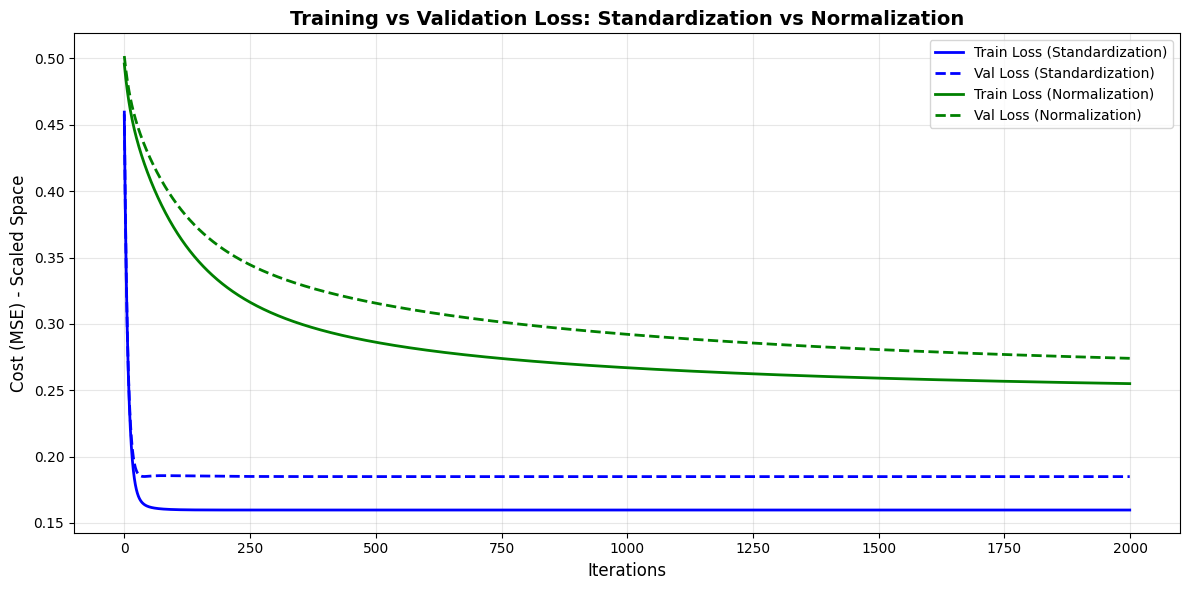

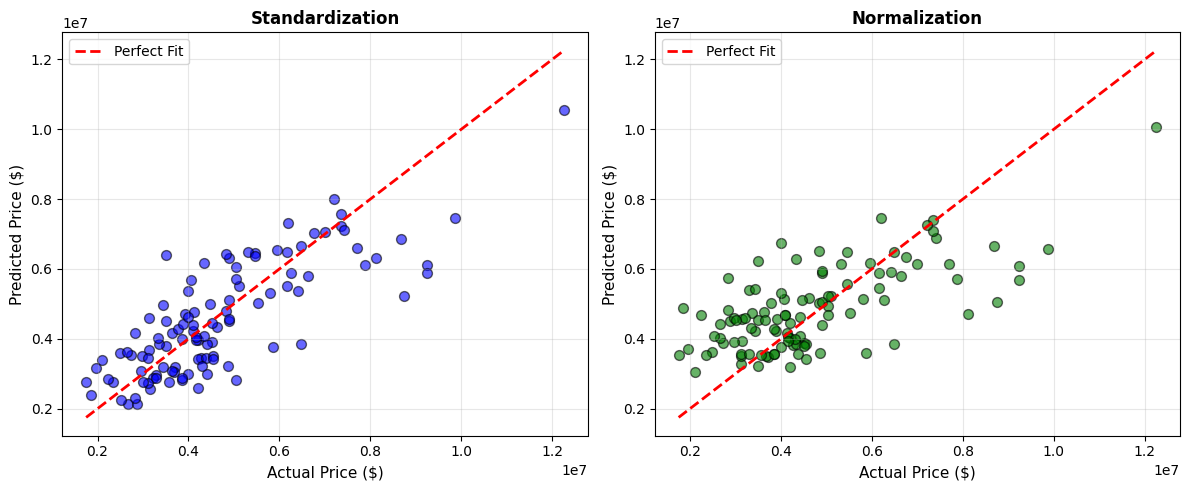

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Train/validation split (80/20)
train_size = int(0.8 * len(X_raw))
X_train_raw, y_train = X_raw[:train_size], y[:train_size]
X_val_raw, y_val = X_raw[train_size:], y[train_size:]

y_mean = y_train.mean()
y_std = y_train.std()
y_train_scaled = (y_train - y_mean) / y_std
y_val_scaled = (y_val - y_mean) / y_std

# Scaling methods - Standardization
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train_raw)
X_val_std = scaler_std.transform(X_val_raw)

# Normalization (min=0, max=1)
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train_raw)
X_val_norm = scaler_norm.transform(X_val_raw)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)
    return J

def gradient_descent(X_train, y_train, X_val, y_val, theta, alpha, iterations):
    m = len(y_train)
    train_cost_history = []
    val_cost_history = []

    for i in range(iterations):
        predictions = X_train.dot(theta)
        errors = predictions - y_train
        theta = theta - (alpha / m) * X_train.T.dot(errors)

        # Record training and validation loss
        train_cost = compute_cost(X_train, y_train, theta)
        val_cost = compute_cost(X_val, y_val, theta)

        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

    return theta, train_cost_history, val_cost_history

alpha = 0.03
iterations = 2000

print("TRAINING WITH STANDARDIZATION:")
theta_std = np.zeros((X_train_std.shape[1], 1))
theta_std, train_history_std, val_history_std = gradient_descent(
    X_train_std, y_train_scaled, X_val_std, y_val_scaled, theta_std, alpha, iterations
)
print(f"Final Training Cost (scaled): {train_history_std[-1]:.4f}")
print(f"Final Validation Cost (scaled): {val_history_std[-1]:.4f}")

print("TRAINING WITH NORMALIZATION:")
theta_norm = np.zeros((X_train_norm.shape[1], 1))
theta_norm, train_history_norm, val_history_norm = gradient_descent(
    X_train_norm, y_train_scaled, X_val_norm, y_val_scaled, theta_norm, alpha, iterations
)
print(f"Final Training Cost (scaled): {train_history_norm[-1]:.4f}")
print(f"Final Validation Cost (scaled): {val_history_norm[-1]:.4f}")

# --- Plot 1: Training vs Validation Loss ---
plt.figure(figsize=(12, 6))
plt.plot(train_history_std, label="Train Loss (Standardization)", linewidth=2, color='blue')
plt.plot(val_history_std, label="Val Loss (Standardization)", linewidth=2, linestyle='--', color='blue')
plt.plot(train_history_norm, label="Train Loss (Normalization)", linewidth=2, color='green')
plt.plot(val_history_norm, label="Val Loss (Normalization)", linewidth=2, linestyle='--', color='green')
plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Cost (MSE) - Scaled Space", fontsize=12)
plt.title("Training vs Validation Loss: Standardization vs Normalization", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Get predictions in scaled space
y_pred_std_scaled = X_val_std.dot(theta_std)
y_pred_norm_scaled = X_val_norm.dot(theta_norm)
y_pred_std = y_pred_std_scaled * y_std + y_mean
y_pred_norm = y_pred_norm_scaled * y_std + y_mean

# --- Plot 2: Predicted vs Actual ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_pred_std, color='blue', alpha=0.6, edgecolors='k', s=50)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Price ($)", fontsize=11)
plt.ylabel("Predicted Price ($)", fontsize=11)
plt.title("Standardization", fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_val, y_pred_norm, color='green', alpha=0.6, edgecolors='k', s=50)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Price ($)", fontsize=11)
plt.ylabel("Predicted Price ($)", fontsize=11)
plt.title("Normalization", fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Final Training Cost (scaled): 0.1598
Final Validation Cost (scaled): 0.1849


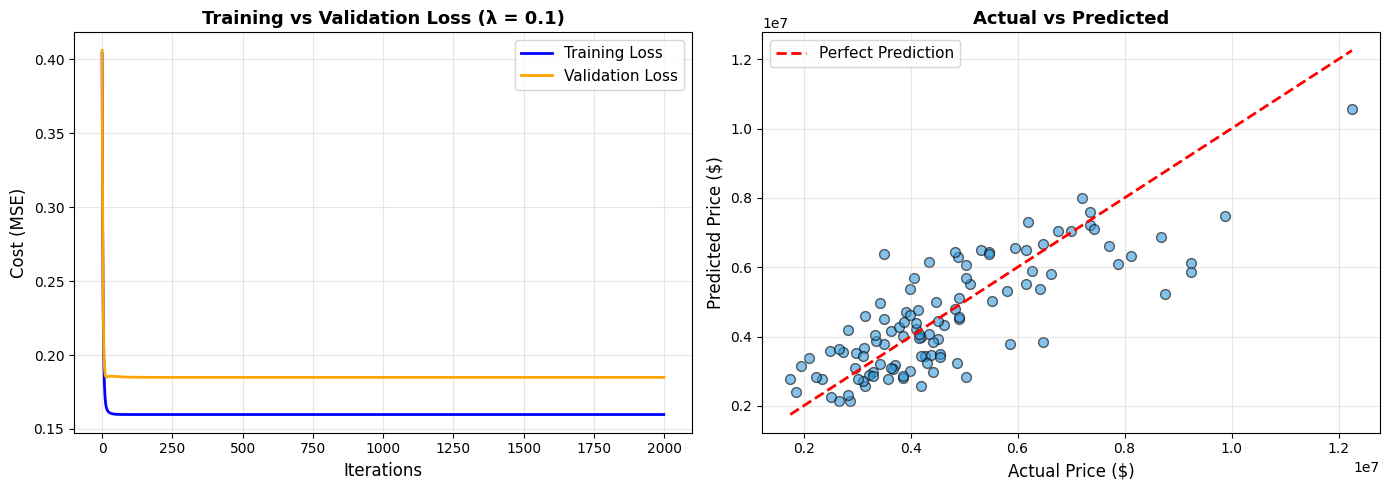

In [31]:
# Problem 3B

# Train/validation split (80/20)
train_size = int(0.8 * len(X_raw))
X_train_raw, y_train = X_raw[:train_size], y[:train_size]
X_val_raw, y_val = X_raw[train_size:], y[train_size:]

y_mean = y_train.mean()
y_std = y_train.std()
y_train_scaled = (y_train - y_mean) / y_std
y_val_scaled = (y_val - y_mean) / y_std

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_val_scaled = scaler.transform(X_val_raw)

# Add intercept term
X_train = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_val = np.c_[np.ones((X_val_scaled.shape[0], 1)), X_val_scaled]

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    return (1 / (2 * m)) * np.sum(errors ** 2)

def compute_cost_regularized(X, y, theta, lambda_reg):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)
    reg_penalty = (lambda_reg / (2 * m)) * np.sum(theta[1:] ** 2)
    return J + reg_penalty

def gradient_descent_regularized(X_train, y_train, X_val, y_val, theta, alpha, iterations, lambda_reg):
    m = len(y_train)
    train_cost_history = []
    val_cost_history = []

    for i in range(iterations):
        predictions = X_train.dot(theta)
        errors = predictions - y_train

        gradient = (1 / m) * X_train.T.dot(errors)
        gradient[1:] += (lambda_reg / m) * theta[1:]

        theta = theta - alpha * gradient

        # Record costs
        train_cost = compute_cost_regularized(X_train, y_train, theta, lambda_reg)
        val_cost = compute_cost(X_val, y_val, theta)

        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

    return theta, train_cost_history, val_cost_history

alpha = 0.07
iterations = 2000
lambda_reg = 0.1 #Penalty

theta = np.zeros((X_train.shape[1], 1))

theta, train_hist, val_hist = gradient_descent_regularized(X_train, y_train_scaled, X_val, y_val_scaled, theta, alpha, iterations, lambda_reg)

print(f"Final Training Cost (scaled): {train_hist[-1]:.4f}")
print(f"Final Validation Cost (scaled): {val_hist[-1]:.4f}")

y_pred_scaled = X_val.dot(theta)
y_pred = y_pred_scaled * y_std + y_mean
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Training vs Validation Loss
axes[0].plot(train_hist, label='Training Loss', linewidth=2, color='blue')
axes[0].plot(val_hist, label='Validation Loss', linewidth=2, color='orange')
axes[0].set_xlabel('Iterations', fontsize=12)
axes[0].set_ylabel('Cost (MSE)', fontsize=12)
axes[0].set_title('Training vs Validation Loss (λ = 0.1)', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot 2: Predicted vs Actual
axes[1].scatter(y_val, y_pred, alpha=0.6, edgecolors='k', s=50, color='#3498db')
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()],
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price ($)', fontsize=12)
axes[1].set_ylabel('Predicted Price ($)', fontsize=12)
axes[1].set_title(f'Actual vs Predicted', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()